In [1]:
# Dependencies
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import json
import re
import unicodedata
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to /Users/tali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Reading the csv file
data_full = pd.read_csv("Resources/winemag-data-130k-v2.csv")
data_full.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
########## CREATING A DICTIONARY OF ALL DESCRIPTIVE WORDS IN REVIEWS AND THE NUMBER OF USES
# Initialize blank word dictionary
word_list = {}

# Loop through every description box
for desc in data_full["description"]:
    
    # Remove accents
    unaccented = word = unicodedata.normalize('NFD', desc).encode('ascii', 'ignore').decode("utf-8")
    # Separate words into list
    desc_words = re.split(r'\W+', unaccented)
    
    # Clean up words
    for word in desc_words:
        # Make lowercase
        word = word.lower()
        
        # Filter out extra words
        if (
            (word not in stopwords.words('english')) and # Stop words
            (word != '') and # Empty Strings
            (not bool(re.search(r'\d', word))) and # Numbers
            (len(set(word)) != 1) # Strings of all the same character
        ):
            # Count the word
            if word in word_list.keys():
                word_list[word] += 1
            else:
                word_list[word] = 1
            
# Rank words by frequency
ranked_words = dict(sorted(word_list.items(), key=lambda x:x[1], reverse = True))

# print(json.dumps(ranked_words, indent = 0))

In [4]:
########### ADDING A COLUMN TO THE DATAFRAME CONTAINING THE KEY WORDS USED IN EACH REVIEW
# Initialize dictionary
key_words = {}

# Loop through every description
for i, desc in enumerate(data_full["description"]):
    
    # Initialize/reset word list at the start of each description
    word_list = []
    
    # Remove accents
    unaccented = word = unicodedata.normalize('NFD', desc).encode('ascii', 'ignore').decode("utf-8")
    # Separate words into list
    desc_words = re.split(r'\W+', unaccented)
    
    # Clean up words
    for word in desc_words:
        # Make lowercase
        word = word.lower()
        
        # Filter out extra words
        if (
            (word not in stopwords.words('english')) and # Stop words
            (word != '') and # Empty Strings
            (not bool(re.search(r'\d', word))) and # Numbers
            (len(set(word)) != 1) # Strings of all the same character
        ):
            # Add key words to word list
            if word not in word_list:
                word_list.append(word)
        # Store these words in dictionary
        key_words[i] = word_list

# Check dictionary
# key_words

In [5]:
# Convert key words dictionary into a dataframe
data_full['Key Words']= data_full['Unnamed: 0'].map(key_words)
data_full.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Key Words
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"[aromas, include, tropical, fruit, broom, brim..."
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"[ripe, fruity, wine, smooth, still, structured..."
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"[tart, snappy, flavors, lime, flesh, rind, dom..."
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"[pineapple, rind, lemon, pith, orange, blossom..."
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"[much, like, regular, bottling, comes, across,..."


In [6]:
############ CREATING WORD BANKS FOR DIFFERENT AREAS OF DESCRIPTIVENESS

# Scale 1: Fruit-forward to savory
fruit_forward = ['raspberry','blackberry','blueberry','jam','prune','fruit','raisin','lemon','apple','orange','peach','mango','pineapple',\
'pear','cantaloupe','melon','berry','fruit','fruits','fruity','plum','citrus','orange','apricot', 'grapefruit','grape','grapes',\
'tangerine','berries','jammy','candied','nectarine','gooseberry','boysenberry','elderberry','berries']
savory = ['cranberry','rhubarb','currant','pepper','peppercorn','olive','sour','cherry','mulberry','bilberry','peony','blueberry','herbs','game','sage',\
          'leather','tobacco','charcoal','tar','underbrush','garrigue','gravel','torrefaction','mineral','woodsmoke','grass','oak','wood','earthy','stone']
# Scale 2: Sweetness
sweet = ['sweet', 'sweetness']
dry = ['dry','dryness']

# Scale 3: Body
light_body = ['subtle','delicate','elegant','crisp','thin','finesse','bright','floral','light','zesty','airy','lean','racy','crisp','zippy','austere',\
              'long','brilliant','lively','moderate','juicy','fleshy','tart','mellow','soft']
full_body = ['rich','lush','opulent','rigid','intense','bold','extracted','tannins','firm','structured','muscular','concentrated','hot','oily','buttery']



In [7]:
############# Creating new columns for each of these categories

# Initilize dictionaries for each category
num_fruit = {}
num_savory = {}
num_sweet = {}
num_dry = {}
num_light = {}
num_full = {}

# Loop through the key words column
for i, desc in enumerate(data_full["description"]):
    
     # Initilize/reset variables
    fruit_ct = 0
    savory_ct = 0
    sweet_ct = 0
    dry_ct = 0
    light_ct = 0
    full_ct = 0
    
    # Remove accents
    unaccented = word = unicodedata.normalize('NFD', desc).encode('ascii', 'ignore').decode("utf-8")
    # Separate words into list
    desc_words = re.split(r'\W+', unaccented)
    
    # Clean up words
    for word in desc_words:
        # Make lowercase
        word = word.lower()    
   
        if word in fruit_forward:
            fruit_ct += 1
        if word in savory:
            savory_ct += 1
        if word in sweet:
            sweet_ct += 1
        if word in dry:
            dry_ct += 1
        if word in light_body:
            light_ct += 1
        if word in full_body:
            full_ct += 1
            
        num_fruit[i] = fruit_ct 
        num_savory[i] = savory_ct
        num_sweet [i] = sweet_ct
        num_dry[i] = dry_ct
        num_light[i] = light_ct
        num_full[i] = full_ct
        

In [8]:
# Create new columns with the categorical counts
data_full['Fruit Forward']= data_full['Unnamed: 0'].map(num_fruit)
data_full['Savory']= data_full['Unnamed: 0'].map(num_savory)
data_full['Sweet']= data_full['Unnamed: 0'].map(num_sweet)
data_full['Dry']= data_full['Unnamed: 0'].map(num_dry)
data_full['Light Body']= data_full['Unnamed: 0'].map(num_light)
data_full['Full Body']= data_full['Unnamed: 0'].map(num_full)

# Drop unnecessary columns for a clean look
data_clean = data_full.drop(columns=['region_2','taster_name','taster_twitter_handle'])
data_clean.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,title,variety,winery,Key Words,Fruit Forward,Savory,Sweet,Dry,Light Body,Full Body
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"[aromas, include, tropical, fruit, broom, brim...",3,1,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"[ripe, fruity, wine, smooth, still, structured...",3,0,0,0,1,3
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"[tart, snappy, flavors, lime, flesh, rind, dom...",1,0,0,0,2,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"[pineapple, rind, lemon, pith, orange, blossom...",4,0,0,0,0,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"[much, like, regular, bottling, comes, across,...",0,1,0,0,0,0


In [17]:
############ NORMALIZE VARIALBES TO A SCALE

# Define a function that normalizes a column
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Create a scale for fruit forward to savory
fruit_scale = normalize(data_clean["Fruit Forward"])
savory_scale = (normalize(data_clean["Savory"]))*(-1)
fruit_savory_scale = fruit_scale + savory_scale

# Create a scale for light to clean body
light_scale = normalize(data_clean["Light Body"])*(-1)
full_scale = normalize(data_clean["Full Body"])
body_scale = light_scale + full_scale

# Add normalized columns to dataframe
data_clean['Fruit Forward to Savory Scale']= data_clean['Unnamed: 0'].map(fruit_savory_scale)
data_clean['Body Scale']= data_clean['Unnamed: 0'].map(body_scale)

data_clean.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,title,variety,winery,Key Words,Fruit Forward,Savory,Sweet,Dry,Light Body,Full Body,Fruit Forward to Savory Scale,Body Scale
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,"[aromas, include, tropical, fruit, broom, brim...",3,1,0,0,0,0,0.222222,0.000000
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"[ripe, fruity, wine, smooth, still, structured...",3,0,0,0,1,3,0.333333,0.285714
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"[tart, snappy, flavors, lime, flesh, rind, dom...",1,0,0,0,2,0,0.111111,-0.285714
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"[pineapple, rind, lemon, pith, orange, blossom...",4,0,0,0,0,1,0.444444,0.142857
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"[much, like, regular, bottling, comes, across,...",0,1,0,0,0,0,-0.111111,0.000000


Text(0.5, 1.0, 'Price vs Flavor Profile')

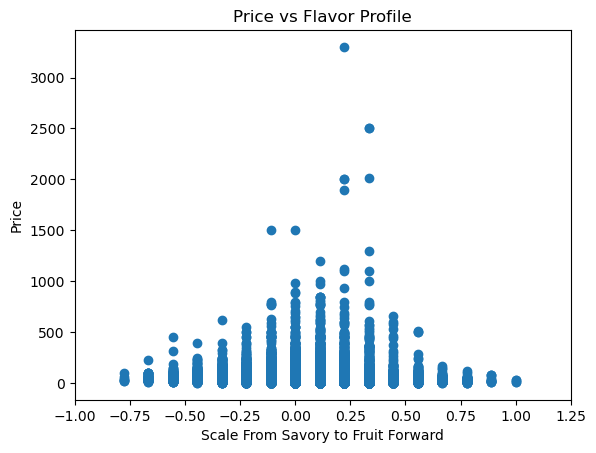

In [18]:
########### CREATING PLOTS USING THESE NORMALIZED SCALES

plt.scatter(data_clean["Fruit Forward to Savory Scale"], data_clean["price"])
plt.xlim(-1, 1.25, .25)
plt.xlabel("Scale From Savory to Fruit Forward")
plt.ylabel("Price")
plt.title("Price vs Flavor Profile")

Text(0.5, 1.0, 'Price vs Body Profile')

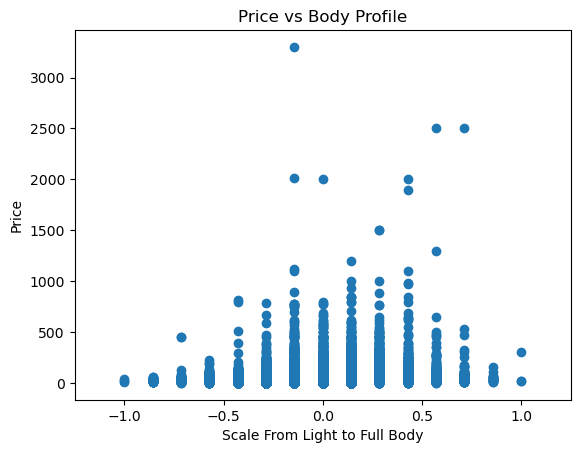

In [20]:
plt.scatter(data_clean["Body Scale"], data_clean["price"])
plt.xlim(-1.25, 1.25, .25)
plt.xlabel("Scale From Light to Full Body")
plt.ylabel("Price")
plt.title("Price vs Body Profile")